In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/classify\ rooms\ with\ cnn

/content/drive/MyDrive/classify rooms with cnn


In [4]:
# import os

# # Define the folder names
# base_folder = 'data'
# subfolders = ['bed_room', 'dining_room', 'living_room']

# # Create the base folder if it doesn't exist
# if not os.path.exists(base_folder):
#     os.makedirs(base_folder)

# # Create subfolders
# for subfolder in subfolders:
#     folder_path = os.path.join(base_folder, subfolder)
#     if not os.path.exists(folder_path):
#         os.makedirs(folder_path)

# # Print the created folder structure
# print(f"Created folder structure: {base_folder}/")
# for subfolder in subfolders:
#     print(f" - {base_folder}/{subfolder}/")


# Import necessary libraries

In [71]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load dataset


In [73]:
# Load dataset
room_types = os.listdir('dataset')
print("Types of rooms found: ", len(room_types))
print(room_types)


Types of rooms found:  3
['bed_room', 'dining_room', 'living_room']


# Create a list to store room information


In [74]:
# Create a list to store room information
rooms = []
for item in room_types:
    all_rooms = os.listdir('dataset' + '/' + item)
    for room in all_rooms:
        rooms.append((item, str('dataset' + '/' + item) + '/' + room))

# Build a DataFrame

In [75]:
# Build a DataFrame
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())
print(rooms_df.tail())

  room type                                  image
0  bed_room  dataset/bed_room/bed-1303451__340.jpg
1  bed_room  dataset/bed_room/bed-1846251__340.jpg
2  bed_room  dataset/bed_room/bed-3786264__340.jpg
3  bed_room  dataset/bed_room/bed-4065946__340.jpg
4  bed_room  dataset/bed_room/bed-4343379__340.jpg
      room type                                         image
42  living_room  dataset/living_room/pexels-photo-245208.jpeg
43  living_room  dataset/living_room/pexels-photo-275484.jpeg
44  living_room  dataset/living_room/pexels-photo-276583.jpeg
45  living_room  dataset/living_room/pexels-photo-276724.jpeg
46  living_room  dataset/living_room/pexels-photo-279719.jpeg


# Check the number of samples for each category

In [76]:
# Check the number of samples for each category
print("Total number of rooms in the dataset: ", len(rooms_df))
room_count = rooms_df['room type'].value_counts()
print("Rooms in each category:")
print(room_count)

Total number of rooms in the dataset:  47
Rooms in each category:
living_room    24
bed_room       12
dining_room    11
Name: room type, dtype: int64


# Image preprocessing

In [78]:
# Image preprocessing
im_size = 60
images = []
labels = []

for i in room_types:
    data_path = 'dataset/' + str(i)
    filenames = [i for i in os.listdir(data_path)]
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

# Transform image array to a numpy type

In [79]:
# Transform image array to a numpy type
images = np.array(images) / 255.0

# One-hot encode labels

In [80]:
# One-hot encode labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(rooms_df['room type'])
num_classes = len(label_encoder.classes_)
train_y = to_categorical(integer_encoded, num_classes=num_classes)

# Shuffle and split the dataset

In [81]:
# Shuffle and split the dataset
train_x, test_x, train_y, test_y = train_test_split(images, train_y, test_size=0.05, random_state=415)

# Print the shapes to verify
print("Shape of train_x:", train_x.shape)
print("Shape of train_y:", train_y.shape)


Shape of train_x: (44, 60, 60, 3)
Shape of train_y: (44, 3)


# Define CNN architecture parameters

In [82]:
# Define CNN architecture parameters
img_size = 60
num_channels = 3

# Define CNN model

In [83]:
# Define CNN model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(img_size, img_size, num_channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


# model summary

In [84]:
# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 56, 56, 32)        2432      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 28, 28, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 64)        51264     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 12, 12, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 4, 4, 128)        

# Compile the model

In [85]:
# Compile the model
loss_fn = tf.keras.losses.CategoricalCrossentropy()
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Training loop

In [86]:
# Training loop
n_epochs = 10
history = model.fit(train_x, train_y, epochs=n_epochs, verbose=1)

Epoch 1/10
2/2 [==============================] - 2s 191ms/step - loss: 2.1172 - accuracy: 0.5227
Epoch 2/10
2/2 [==============================] - 1s 207ms/step - loss: 1.0161 - accuracy: 0.4545
Epoch 3/10
2/2 [==============================] - 1s 293ms/step - loss: 1.0824 - accuracy: 0.3182
Epoch 4/10
2/2 [==============================] - 1s 279ms/step - loss: 1.0852 - accuracy: 0.5227
Epoch 5/10
2/2 [==============================] - 1s 261ms/step - loss: 1.0425 - accuracy: 0.5227
Epoch 6/10
2/2 [==============================] - 1s 313ms/step - loss: 1.0457 - accuracy: 0.5227
Epoch 7/10
2/2 [==============================] - 1s 295ms/step - loss: 1.0357 - accuracy: 0.5227
Epoch 8/10
2/2 [==============================] - 1s 495ms/step - loss: 1.0270 - accuracy: 0.5227
Epoch 9/10
2/2 [==============================] - 1s 345ms/step - loss: 1.0044 - accuracy: 0.5227
Epoch 10/10
2/2 [==============================] - 1s 168ms/step - loss: 0.9910 - accuracy: 0.5227


# Model evaluation

In [87]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_x, test_y)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 0s 317ms/step - loss: 1.0879 - accuracy: 0.3333
Test Loss: 1.0879
Test Accuracy: 0.3333


1/1 [==============================] - 1s 571ms/step


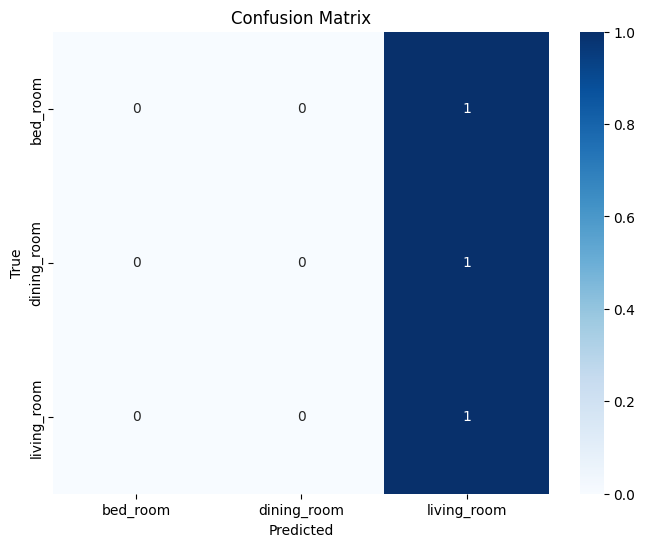

Classification Report:
               precision    recall  f1-score   support

    bed_room       0.00      0.00      0.00         1
 dining_room       0.00      0.00      0.00         1
 living_room       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on test set
predictions = model.predict(test_x)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(test_y, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_))


In [95]:
import cv2
import matplotlib.pyplot as plt

# Function to predict the class
def predict_class(model, image_path, label_encoder):
    # Load the original image
    original_img = cv2.imread(image_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    # Display the original image
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Preprocess the image for prediction
    img = cv2.resize(original_img, (img_size, img_size))  # Resize the image to match the model's expected sizing
    img = img.astype('float32') / 255.0  # Normalize the image

    # Reshape the image to (1, img_size, img_size, num_channels) as the model expects a batch of images
    img = img.reshape((1, img_size, img_size, num_channels))

    # Make a prediction
    predictions = model.predict(img)

    # Decode the one-hot encoded prediction
    predicted_class_idx = np.argmax(predictions)
    predicted_class = label_encoder.classes_[predicted_class_idx]

    # Display the image with the predicted class
    plt.imshow(original_img)
    plt.title(f"Predicted class: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

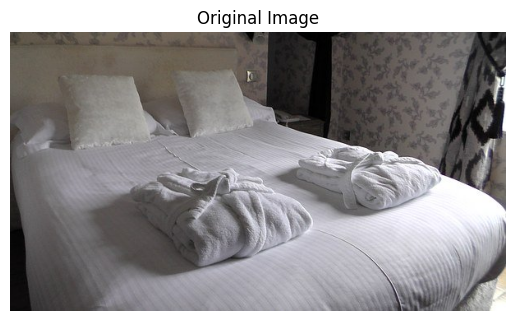

1/1 [==============================] - 0s 43ms/step


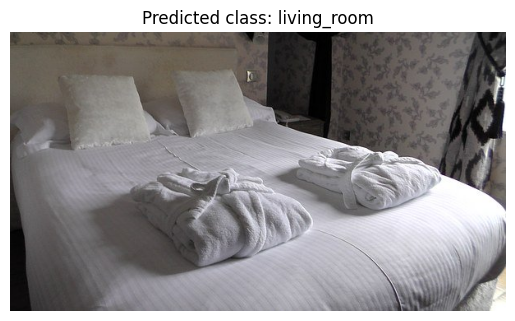

The predicted class is: living_room


In [96]:
# Example usage
image_path = 'dataset/bed_room/bed-1303451__340.jpg'  # Replace this with the path of your image
predicted_class = predict_class(model, image_path, label_encoder)
print(f"The predicted class is: {predicted_class}")
